# KNN project (IRIS Classification)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#Load the dataset

df=pd.read_csv("iris.csv")

###### EDA

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.drop("Id", axis=1, inplace=True)

In [24]:
#No need to do feature scaling

for col in df.columns:
    print(min(df[col]), max(df[col]))

4.3 7.9
2.0 4.4
1.0 6.9
0.1 2.5
Iris-setosa Iris-virginica


###### EDA Visualization

<Figure size 720x720 with 0 Axes>

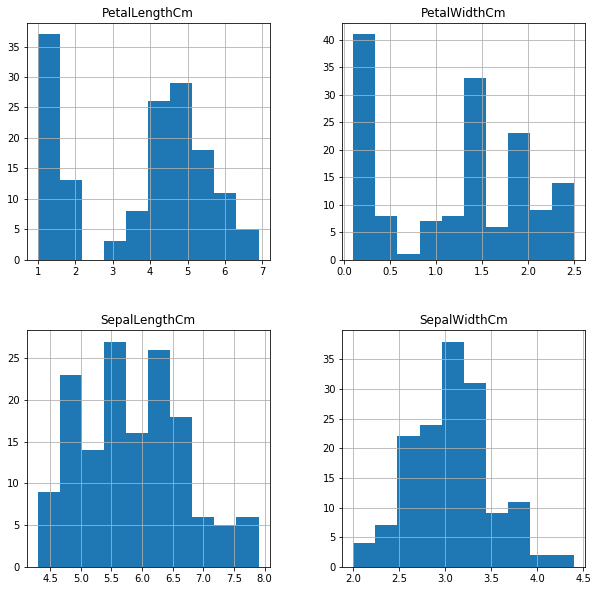

In [26]:
#Histograms

plt.figure(figsize=(10,10))
df.hist(grid=True, figsize=(10,10))
plt.show()

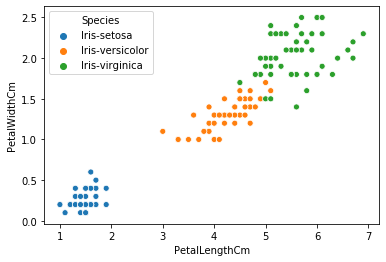

In [39]:
#Species scatter plot w.r.t. PetalWidth vs PetalLength

sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)

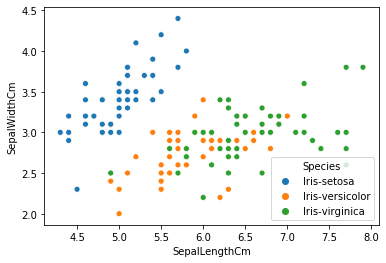

In [41]:
#Species scatter plot w.r.t. SepalLength vs SepalWidth

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)

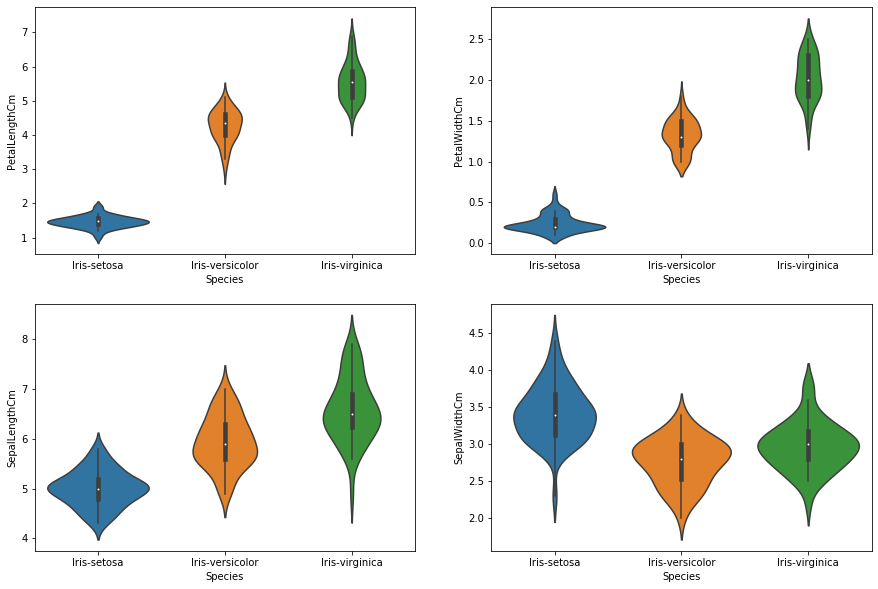

In [46]:
#how the length and width vary according to the species

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

###### Correlation

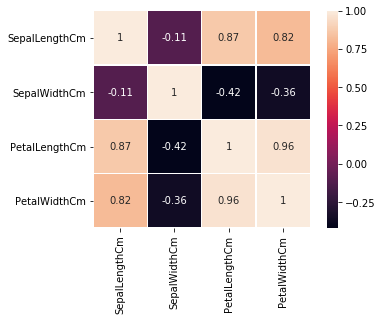

In [51]:
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)

###### Modeling

In [56]:
y=df["Species"]
X=df.drop("Species", axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.9777777777777777


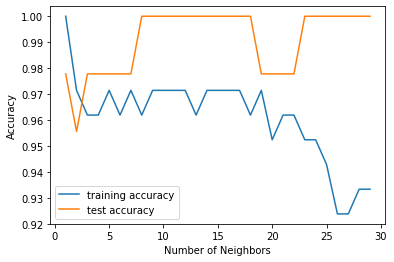

In [73]:
neighbors=np.arange(1,30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for index, val in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train, y_train)
    train_accuracy[index] = (knn.score(X_train, y_train))
    y_pred=knn.predict(X_test)
    test_accuracy[index] = knn.score(X_test, y_test)
    
plt.plot(neighbors, train_accuracy, label="training accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
plt.show()

###### This notebook shows the implementation of KNN classfication algorithm over IRIS dataset w.r.t.  EDA and modeling.

###### Observations:
###### Using different values of N for knn gives us varying values of accuracy.
###### Choosing low value for number of neihgbors gives underfitting while choosing high value for knn overfits the data.
###### So, it will be better to choose in the middle with the values of N between(3 to 6) or (19,23).

